# Verarbeitung von Excel- und CSV-Dateien mit `pandas`

In [152]:
import math
import pandas

file = "51000-22i.csv"

def keyconv(s):
    if int(s) > 0:
        return 10
    else:
        return 0
    
def convert(s):
    #print(s)
    if s == '-':
        return 0
    return float(s)


frame = pandas.read_csv(file, sep=";", header=[6, 7], converters={1: keyconv, 3: convert, 4: convert, 5: convert, 6: convert}, index_col=[0, 1, 2], skipfooter=3, engine='python')
frame

Ausfuhr: Gewicht  \
                                                                            t   
2018 111.0  Getreide (ohne Reis), Hülsenfrüchte und Ölsaaten         733851.0   
     112.0  Reis                                                          0.0   
     113.0  Gemüse und Melonen sowie Wurzeln und Knollen            1090079.0   
     114.0  Zuckerrohr                                                    0.0   
     115.0  Tabak                                                         2.0   
...                                                                       ...   
2008 3511.0 Elektrischer Strom                                            0.0   
     3521.0 Industriell erzeugte Gase                                     0.0   
     8900.0 Sonstige Waren                                          7092949.0   
     8988.0 Sperrungen in der Außenhandelsstatistik                       0.0   
     NaN    Insgesamt                                             108051834.0   

                                                                  Ausfuhr  \
                                                                 Tsd. EUR   
2018 111.0  Getreide (ohne Reis), Hülsenfrüchte und Ölsaaten     196861.0   
     112.0  Reis                                                      0.0   
     113.0  Gemüse und Melonen sowie Wurzeln und Knollen         190628.0   
     114.0  Zuckerrohr                                                0.0   
     115.0  Tabak                                                    15.0   
...                                                                   ...   
2008 3511.0 Elektrischer Strom                                  1533628.0   
     3521.0 Industriell erzeugte Gase                                 0.0   
     8900.0 Sonstige Waren                                     10494233.0   
     8988.0 Sperrungen in der Außenhandelsstatistik                   0.0   
     NaN    Insgesamt                                         171294326.0   

                                                             Einfuhr: Gewicht  \
                                                                            t   
2018 111.0  Getreide (ohne Reis), Hülsenfrüchte und Ölsaaten        4701470.0   
     112.0  Reis                                                       2509.0   
     113.0  Gemüse und Melonen sowie Wurzeln und Knollen            1439456.0   
     114.0  Zuckerrohr                                                   10.0   
     115.0  Tabak                                                      1001.0   
...                                                                       ...   
2008 3511.0 Elektrischer Strom                                            0.0   
     3521.0 Industriell erzeugte Gase                                     0.0   
     8900.0 Sonstige Waren                                          7628559.0   
     8988.0 Sperrungen in der Außenhandelsstatistik                       0.0   
     NaN    Insgesamt                                             179419412.0   

                                                                  Einfuhr  
                                                                 Tsd. EUR  
2018 111.0  Getreide (ohne Reis), Hülsenfrüchte und Ölsaaten    1590075.0  
     112.0  Reis                                                   1987.0  
     113.0  Gemüse und Melonen sowie Wurzeln und Knollen        1619725.0  
     114.0  Zuckerrohr                                               19.0  
     115.0  Tabak                                                 36370.0  
...                                                                   ...  
2008 3511.0 Elektrischer Strom                                   302490.0  
     3521.0 Industriell erzeugte Gase                                 0.0  
     8900.0 Sonstige Waren                                     11719562.0  
     8988.0 Sperrungen in der Außenhandelsstatistik                   0.0  
     NaN    Insgesamt                  

In [128]:
frame[('Ausfuhr', 'Tsd. EUR')]

2018  111.0   Getreide (ohne Reis), Hülsenfrüchte und Ölsaaten       196861.0
      112.0   Reis                                                        0.0
      113.0   Gemüse und Melonen sowie Wurzeln und Knollen           190628.0
      114.0   Zuckerrohr                                                  0.0
      115.0   Tabak                                                      15.0
                                                                     ...     
2008  3511.0  Elektrischer Strom                                    1533628.0
      3521.0  Industriell erzeugte Gase                                   0.0
      8900.0  Sonstige Waren                                       10494233.0
      8988.0  Sperrungen in der Außenhandelsstatistik                     0.0
      NaN     Insgesamt                                           171294326.0
Name: (Ausfuhr, Tsd. EUR), Length: 2739, dtype: float64

In [132]:
frame.index

Index([ (2018, 111),  (2018, 112),  (2018, 113),  (2018, 114),  (2018, 115),
        (2018, 116),  (2018, 119),  (2018, 121),  (2018, 122),  (2018, 123),
       ...
       (2008, 3100), (2008, 3101), (2008, 3102), (2008, 3103), (2008, 3109),
       (2008, 3511), (2008, 3521), (2008, 8900), (2008, 8988),    (2008, 0)],
      dtype='object', length=2739)

In [131]:
new_index = []
for idx in frame.index:
    x, y, z = idx
    if math.isnan(y):
        y = 0
    else:
        y = int(y)
    new_index.append((x, y))

frame.index = new_index

In [134]:
frame[('Ausfuhr', 'Tsd. EUR')]

(2018, 111)        196861.0
(2018, 112)             0.0
(2018, 113)        190628.0
(2018, 114)             0.0
(2018, 115)            15.0
                   ...     
(2008, 3511)      1533628.0
(2008, 3521)            0.0
(2008, 8900)     10494233.0
(2008, 8988)            0.0
(2008, 0)       171294326.0
Name: (Ausfuhr, Tsd. EUR), Length: 2739, dtype: float64

In [142]:
# Aus- und Einfuhr von Braunkohle

frame.filter(items=[(x, 520) for x in range(2008,2019) ], axis=0)

,Ausfuhr: Gewicht,Ausfuhr,Einfuhr: Gewicht,Einfuhr
,t,Tsd. EUR,t,Tsd. EUR
"(2008, 520)",374849.0,22407.0,32840.0,575.0
"(2009, 520)",389830.0,29438.0,11530.0,273.0
"(2010, 520)",567752.0,42316.0,1798.0,134.0
"(2011, 520)",607096.0,48740.0,60.0,5.0
"(2012, 520)",612841.0,52235.0,75.0,6.0
"(2013, 520)",559520.0,49577.0,29479.0,1661.0
"(2014, 520)",854530.0,71076.0,45375.0,2760.0
"(2015, 520)",789357.0,68418.0,18872.0,1092.0
"(2016, 520)",669318.0,52907.0,10661.0,539.0


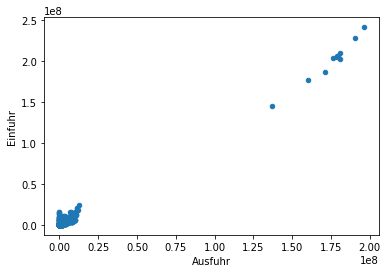

In [143]:
frame.plot.scatter('Ausfuhr', 'Einfuhr')

In [144]:
exports = [ frame.at[(year, 0), ('Ausfuhr', 'Tsd. EUR')] for year in range(2008, 2019) ]
imports = [ frame.at[(year, 0), ('Einfuhr', 'Tsd. EUR')] for year in range(2008, 2019) ]

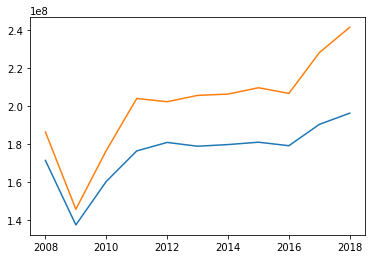

In [145]:
import matplotlib.pyplot as plt

plt.plot(range(2008, 2019), exports)
plt.plot(range(2008, 2019), imports)